In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as s

In [4]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
import torch
from torchvision import datasets, transforms

def get_transformations():
    """
    Define transformations to be applied to the MNIST dataset.
    Resize to 32x32 and convert to tensor.
    """
    return transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor()
    ])

def get_loader(train, batch_size, transformations):
    """
    Create a DataLoader for the MNIST dataset.
    
    Args:
        train (bool): True for training data, False for test data.
        batch_size (int): Number of samples per batch.
        transformations: The transformations to apply on the dataset.
    
    Returns:
        DataLoader: The DataLoader for either training or test data.
    """
    dataset = datasets.MNIST(
        root='data', 
        train=train, 
        download=True, 
        transform=transformations
    )
    
    loader = torch.utils.data.DataLoader(
        dataset, 
        batch_size=batch_size, 
        shuffle=True
    )
    
    return loader

def load_data(train_batch_size, test_batch_size):
    """
    Load training and test data using the DataLoader.
    
    Args:
        train_batch_size (int): Batch size for training data.
        test_batch_size (int): Batch size for test data.
    
    Returns:
        tuple: Training and test DataLoader objects.
    """
    transformations = get_transformations()
    
    # Fetch training data
    train_loader = get_loader(train=True, batch_size=train_batch_size, transformations=transformations)
    
    # Fetch test data
    test_loader = get_loader(train=False, batch_size=test_batch_size, transformations=transformations)
    
    return train_loader, test_loader


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [7]:
def define_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [8]:
def train(model, optimizer, train_loader):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [9]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [10]:
def compute(model, optimizer):
    loss_train_arr = []
    loss_test_arr = []
    test_acc_arr = []
    train_acc_arr = []
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader)
        tr_loss, tr_acc = calculate_loss(model, train_loader, loss_fn)
        t_loss, t_acc = calculate_loss(model, test_loader, loss_fn)
        print("Model Train loss: ", tr_loss)
        loss_train_arr.append(tr_loss)
        loss_test_arr.append(t_loss)
        train_acc_arr.append(tr_acc)
        test_acc_arr.append(t_acc)
    return loss_train_arr, loss_test_arr, train_acc_arr, test_acc_arr

In [11]:
epochs = 30

### LR = 1e-3

In [12]:
torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(500, 500)
model2 = CNN()
optimizer = define_optimizer(model2)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(model2, optimizer)

batch_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(100, 100)
model1 = CNN()
optimizer = define_optimizer(model1)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(model1, optimizer)

batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())

Model Train loss:  tensor(1.4428)
Model Train loss:  tensor(0.2385)
Model Train loss:  tensor(0.1547)
Model Train loss:  tensor(0.1117)
Model Train loss:  tensor(0.0942)
Model Train loss:  tensor(0.0786)
Model Train loss:  tensor(0.0761)
Model Train loss:  tensor(0.0624)
Model Train loss:  tensor(0.0564)
Model Train loss:  tensor(0.0511)
Model Train loss:  tensor(0.0499)
Model Train loss:  tensor(0.0419)
Model Train loss:  tensor(0.0410)
Model Train loss:  tensor(0.0447)
Model Train loss:  tensor(0.0379)
Model Train loss:  tensor(0.0356)
Model Train loss:  tensor(0.0303)
Model Train loss:  tensor(0.0289)
Model Train loss:  tensor(0.0293)
Model Train loss:  tensor(0.0258)
Model Train loss:  tensor(0.0259)
Model Train loss:  tensor(0.0270)
Model Train loss:  tensor(0.0223)
Model Train loss:  tensor(0.0207)
Model Train loss:  tensor(0.0213)
Model Train loss:  tensor(0.0175)
Model Train loss:  tensor(0.0187)
Model Train loss:  tensor(0.0174)
Model Train loss:  tensor(0.0174)
Model Train lo

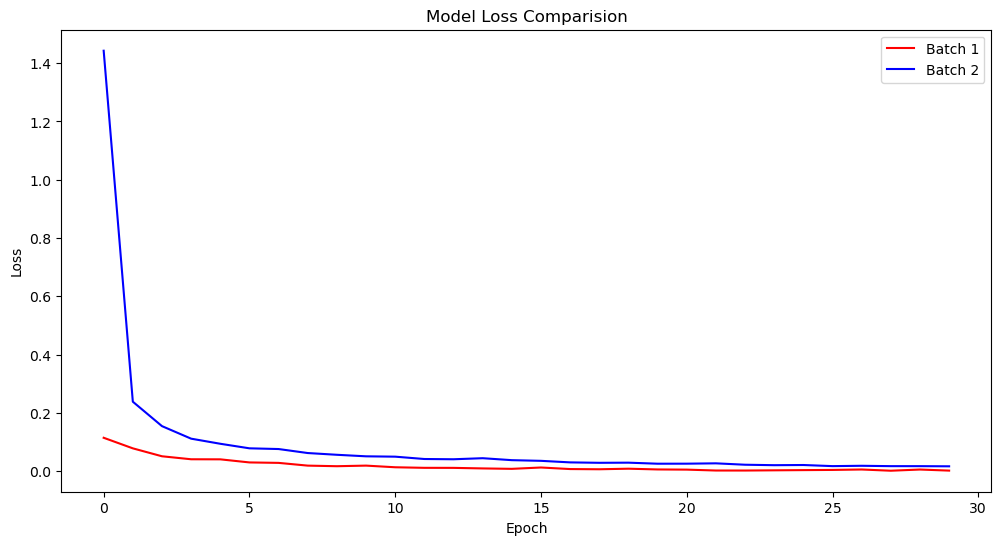

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "b")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

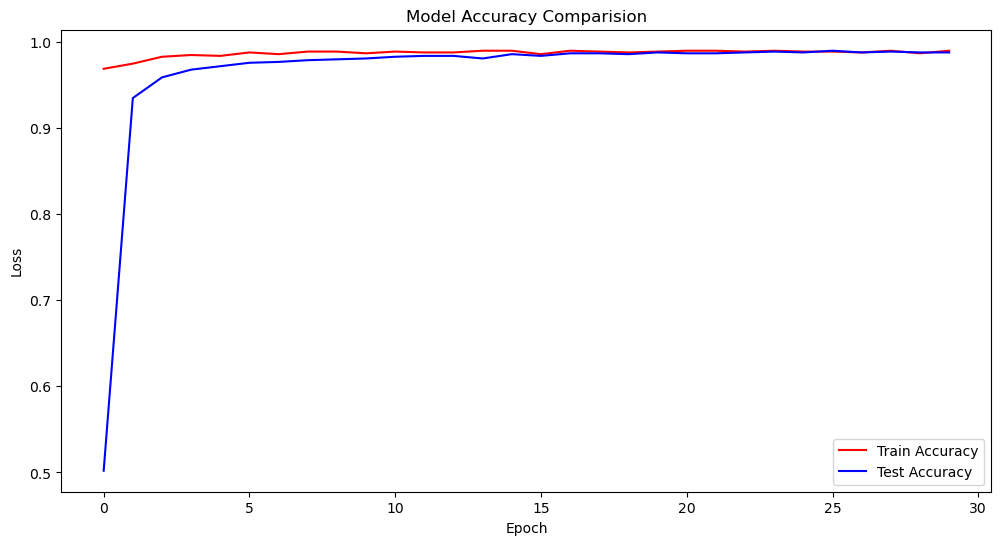

In [33]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "b")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [16]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [27]:
for i, alpha_value in enumerate(alpha):
    theta = torch.lerp(batch_param_1, batch_param_2, alpha_value) 
    model = CNN()
    with torch.no_grad():
        torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()


    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

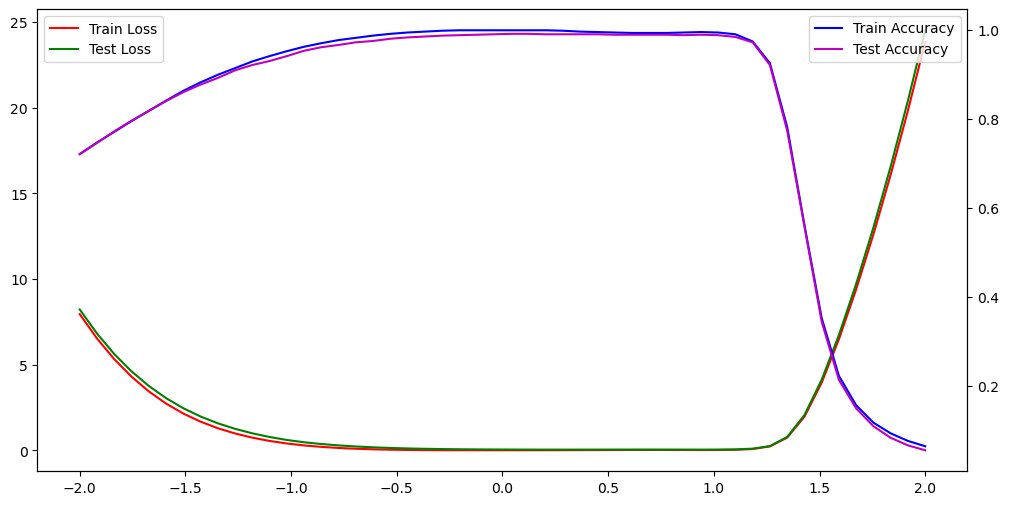

In [30]:
alpha_train_loss_arr = alpha_train_loss_arr[:len(alpha)]
alpha_test_loss_arr = alpha_test_loss_arr[:len(alpha)]
alpha_train_acc_arr = alpha_train_acc_arr[:len(alpha)]
alpha_test_acc_arr = alpha_test_acc_arr[:len(alpha)]
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r")
plt.plot(alpha, alpha_test_loss_arr, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])
plt.twinx()
plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "m")
plt.legend(['Train Accuracy' , 'Test Accuracy'])


### Batch Size 100 & 1000 LR = 1e-3

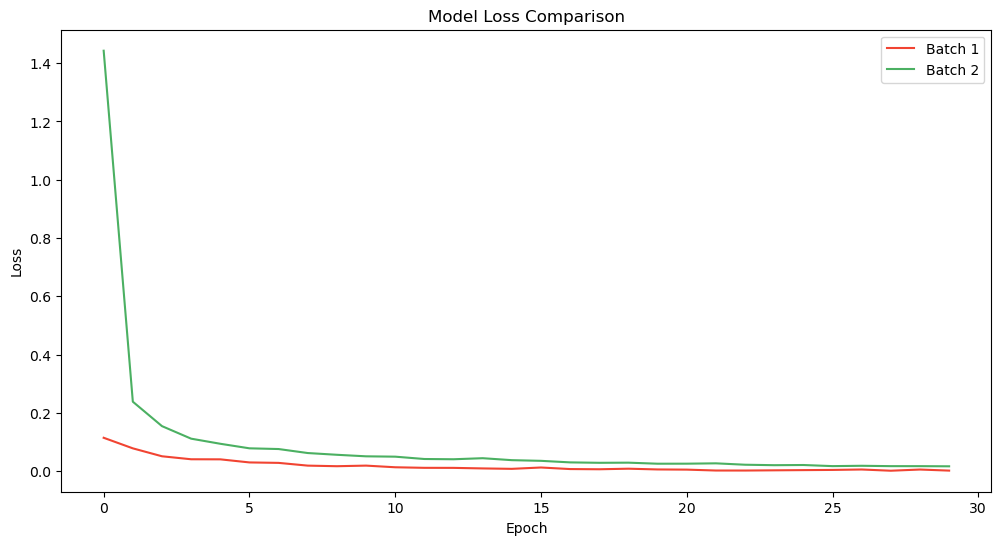

In [32]:

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(30), batch_1_train_loss, color=plt.cm.Reds(0.6))  
ax.plot(np.arange(30), batch_2_train_loss, color=plt.cm.Greens(0.6))
ax.set_title('Model Loss Comparison')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['Batch 1', 'Batch 2'])
plt.show()


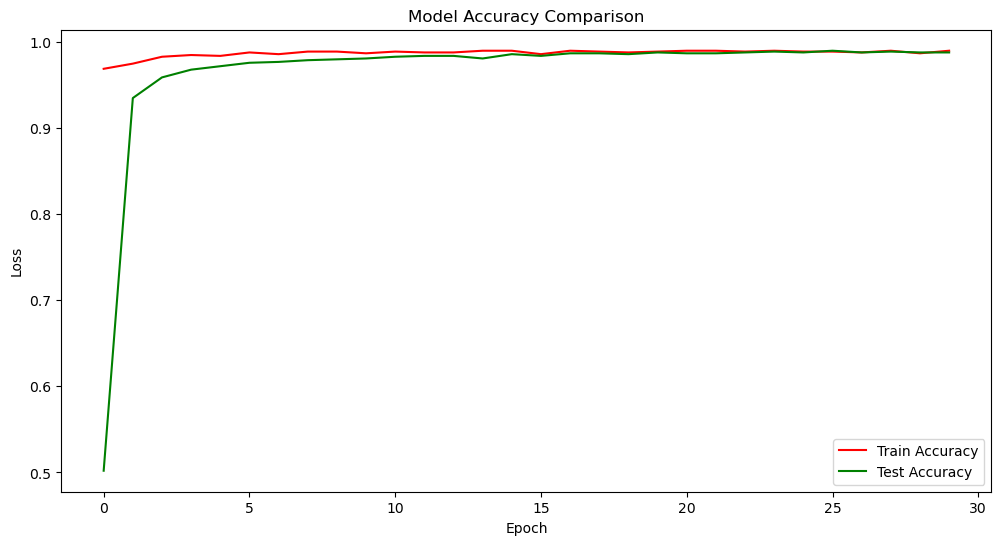

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
for batch_acc, color, label in zip([batch_1_test_acc, batch_2_test_acc], ['r', 'g'], ['Train Accuracy', 'Test Accuracy']):
    ax.plot(range(30), batch_acc, color=color, label=label)
ax.set_title('Model Accuracy Comparison')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


In [38]:
diff = batch_param_2 - batch_param_1
thetaArr = [(batch_param_1 + alpha_val * diff) for alpha_val in alpha]


In [39]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [40]:
# Precompute values outside the loop for efficiency
num_params = []
for i in range(len(thetaArr)):
    torch.manual_seed(1)
    theta = torch.lerp(batch_param_1, batch_param_2, alpha[i])
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    if not num_params:
        num_params = [torch.numel(param) for param in model.parameters()]
    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)


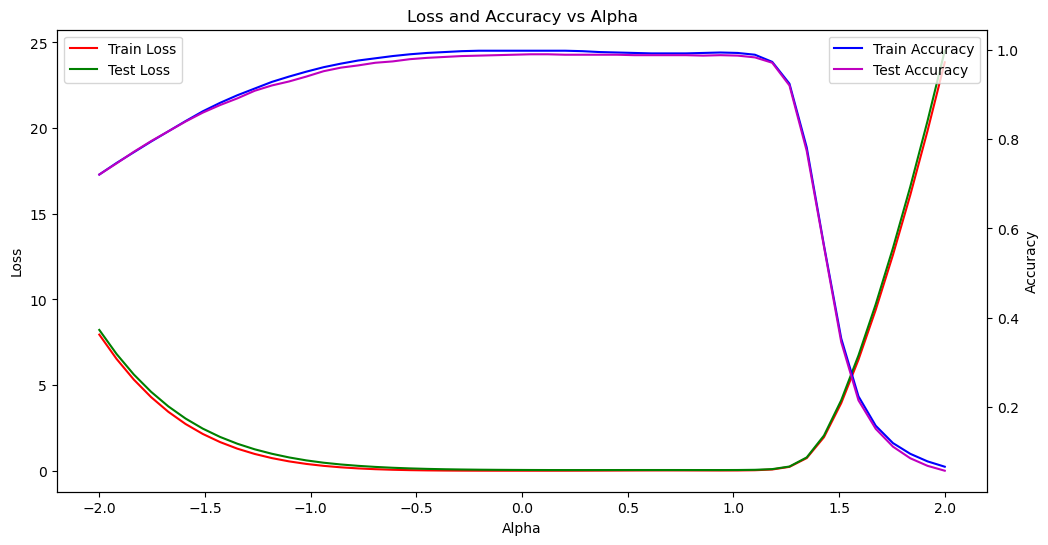

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(alpha, alpha_train_loss_arr, color='r', label='Train Loss')
ax1.plot(alpha, alpha_test_loss_arr, color='g', label='Test Loss')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(alpha, alpha_train_acc_arr, color='b', label='Train Accuracy')
ax2.plot(alpha, alpha_test_acc_arr, color='m', label='Test Accuracy')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')
plt.title('Loss and Accuracy vs Alpha')
plt.show()
